# 1. Analyze the data using the same techniques as for the last assignment.
Decide for yourself which and how to use the specific commands. Answer
the following questions in the report and include figures supporting your
answers:

In [39]:
import pandas as pd

df = pd.read_csv('iris.csv')
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 1.3. Which classes exist? Are they (roughly) balanced?

In [40]:
name_df = df.groupby('Name').size().to_frame('count')
name_df['ratio'] = name_df['count'] / name_df['count'].min()
name_df = name_df.sort_values('ratio')
print(name_df)

                 count  ratio
Name                         
Iris-setosa         50    1.0
Iris-versicolor     50    1.0
Iris-virginica      50    1.0


In [41]:
[name for name in df['Name'].unique()]

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

The classes are perfectly balanced with 50 entries for each class.

## 1.2. Which noteworthy trends of features and relations between features as well as features and Classes do you see?

In [42]:
df.drop(columns=['Name']).corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot: >

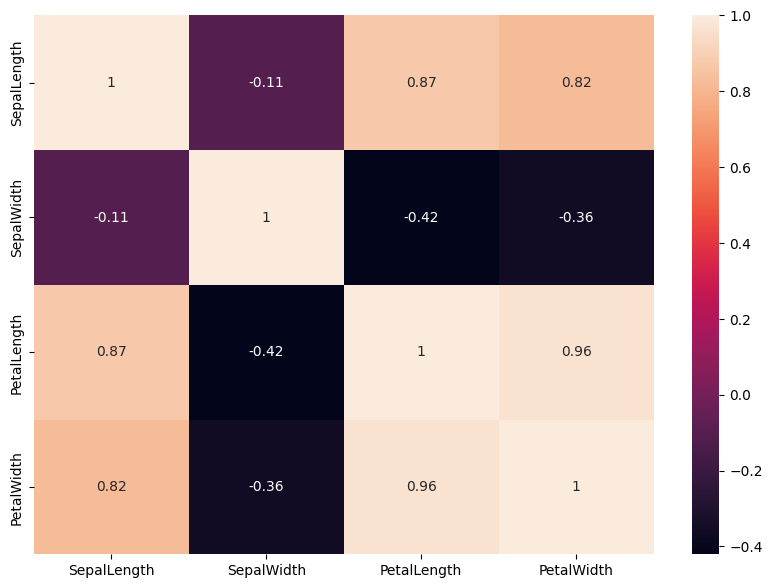

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

f = plt.figure(figsize=(10, 7))
sns.heatmap(df.drop(columns=['Name']).corr(), annot=True)

PetalLength to PetalWidth have a strong correlation.

## 1.3. If you would need to distinguish the classes with those features, which features would you choose, any why?

PetalLength       AxesSubplot(0.125,0.53;0.168478x0.35)
PetalWidth     AxesSubplot(0.327174,0.53;0.168478x0.35)
SepalLength    AxesSubplot(0.529348,0.53;0.168478x0.35)
SepalWidth     AxesSubplot(0.731522,0.53;0.168478x0.35)
dtype: object

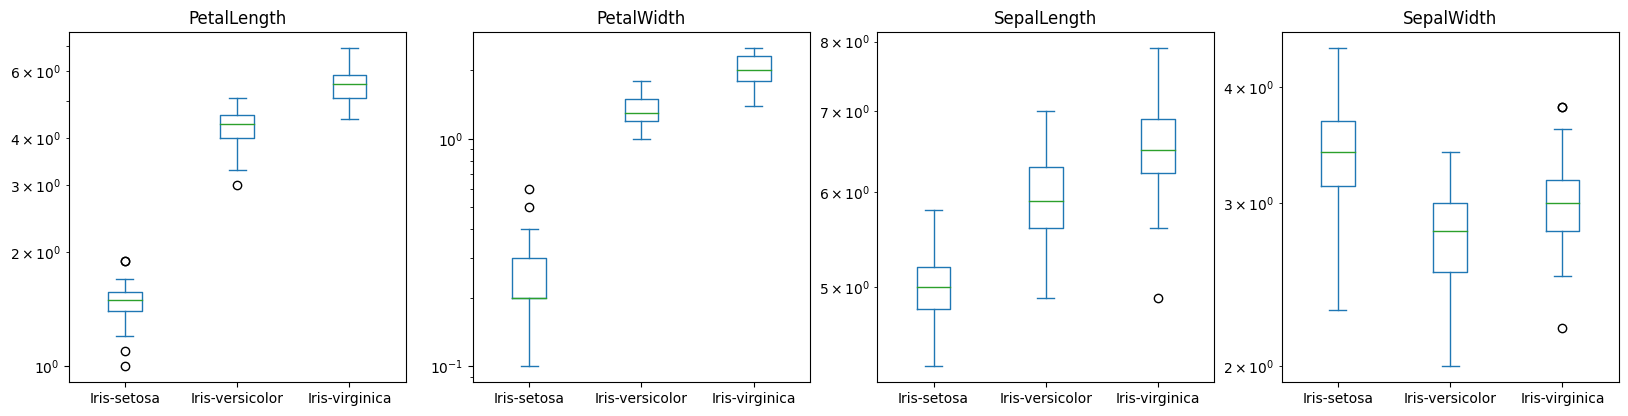

In [44]:
df.plot.box(by="Name", figsize=(20,10), logy=True, layout=(2,4))

The classes can be distinguished very well with the PetalLength and PetalWidth class, at least when you want  to separate setosa and the other classes. For versicolor and virginica multiple features like PetalLength, PetalWidth and SepalLength are probably necessary.

# 2. In order to classify the three different Iris plant species, set up your first ML toolchain including the following steps:
## 2.1. Data and Feature Preprocessing (if necessary and applicable)

### 2.1.1 Are there any outliers in the data which might need to be removed?

Outliers could be removed, but that would reduce the amount of data
It would be better to set a maximum or minimum if a value exceeds a limit.
For example all quantiles below or above 0,02 could be capped.
In the code example below the outliers get selected and printed.

In [45]:
# TODO https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
print('SepalLength:', df["SepalLength"].quantile(0.02), df["SepalLength"].quantile(0.98))
print('SepalWidth:', df["SepalWidth"].quantile(0.02), df["SepalWidth"].quantile(0.98))
print('PetalLength:', df["PetalLength"].quantile(0.02), df["PetalLength"].quantile(0.98))
print('PetalWidth:', df["PetalWidth"].quantile(0.02), df["PetalWidth"].quantile(0.98))
# df[(df["SepalLength"] < df["SepalLength"].quantile(0.02)) | (df["SepalLength"] > df["SepalLength"].quantile(0.98))]

SepalLength: 4.4 7.7
SepalWidth: 2.2 4.002000000000001
PetalLength: 1.2 6.602
PetalWidth: 0.1 2.402000000000001


PetalLength       AxesSubplot(0.125,0.53;0.168478x0.35)
PetalWidth     AxesSubplot(0.327174,0.53;0.168478x0.35)
SepalLength    AxesSubplot(0.529348,0.53;0.168478x0.35)
SepalWidth     AxesSubplot(0.731522,0.53;0.168478x0.35)
dtype: object

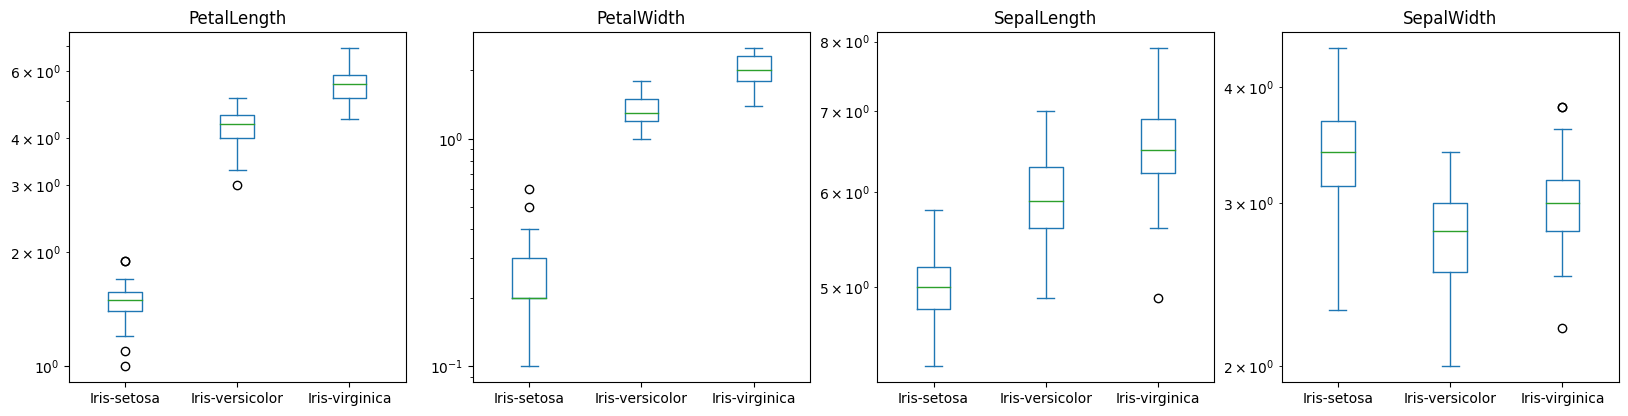

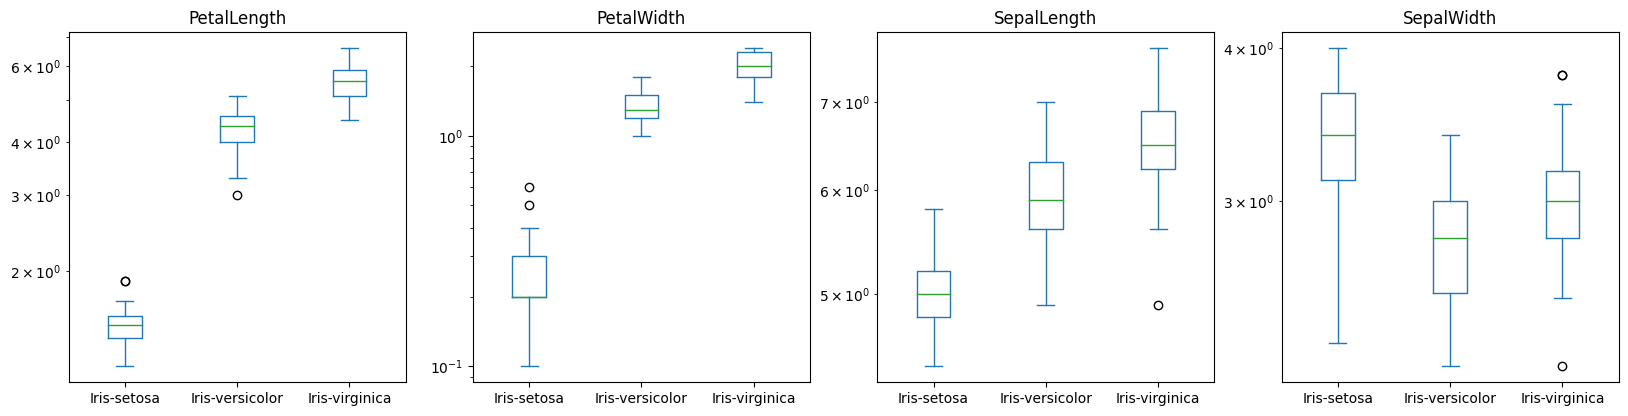

In [46]:
from scipy.stats.mstats import winsorize
df.plot.box(by="Name", figsize=(20,10), logy=True, layout=(2,4))
df['PetalWidth'] = winsorize(df['PetalWidth'], (0.02, 0.02))
df['PetalLength'] = winsorize(df['PetalLength'], (0.02, 0.02))
df['SepalWidth'] = winsorize(df['SepalWidth'], (0.02, 0.02))
df['SepalLength'] = winsorize(df['SepalLength'], (0.02, 0.02))
df.plot.box(by="Name", figsize=(20,10), logy=True, layout=(2,4))

### 2.1.2. Are there any missing values which need to be taken care of?

No there are no missing values which should be replaced.

In [47]:
df.isnull().values.any()

False

### 2.1.3. Do you need to apply any feature preprocessing steps? (e.g Normalization, Feature Deletion/Reduction/Addition)

We can scale the features with the preprocessing library.

In [48]:
from sklearn import preprocessing
X = df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = df['Name']
scaler = preprocessing.StandardScaler().fit(X, y)
X = scaler.transform(X)

X = pd.DataFrame(X, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
print(X)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0      -0.904674    1.077299    -1.347118   -1.316057
1      -1.148302   -0.121476    -1.347118   -1.316057
2      -1.391931    0.358034    -1.404264   -1.316057
3      -1.513745    0.118279    -1.289972   -1.316057
4      -1.026488    1.317054    -1.347118   -1.316057
..           ...         ...          ...         ...
145     1.044354   -0.121476     0.824424    1.456906
146     0.557097   -1.320250     0.710132    0.928723
147     0.800726   -0.121476     0.824424    1.060769
148     0.435283    0.837544     0.938716    1.456906
149     0.069840   -0.121476     0.767278    0.796677

[150 rows x 4 columns]


Yes we can add a new feature where we divide all features pairwise.

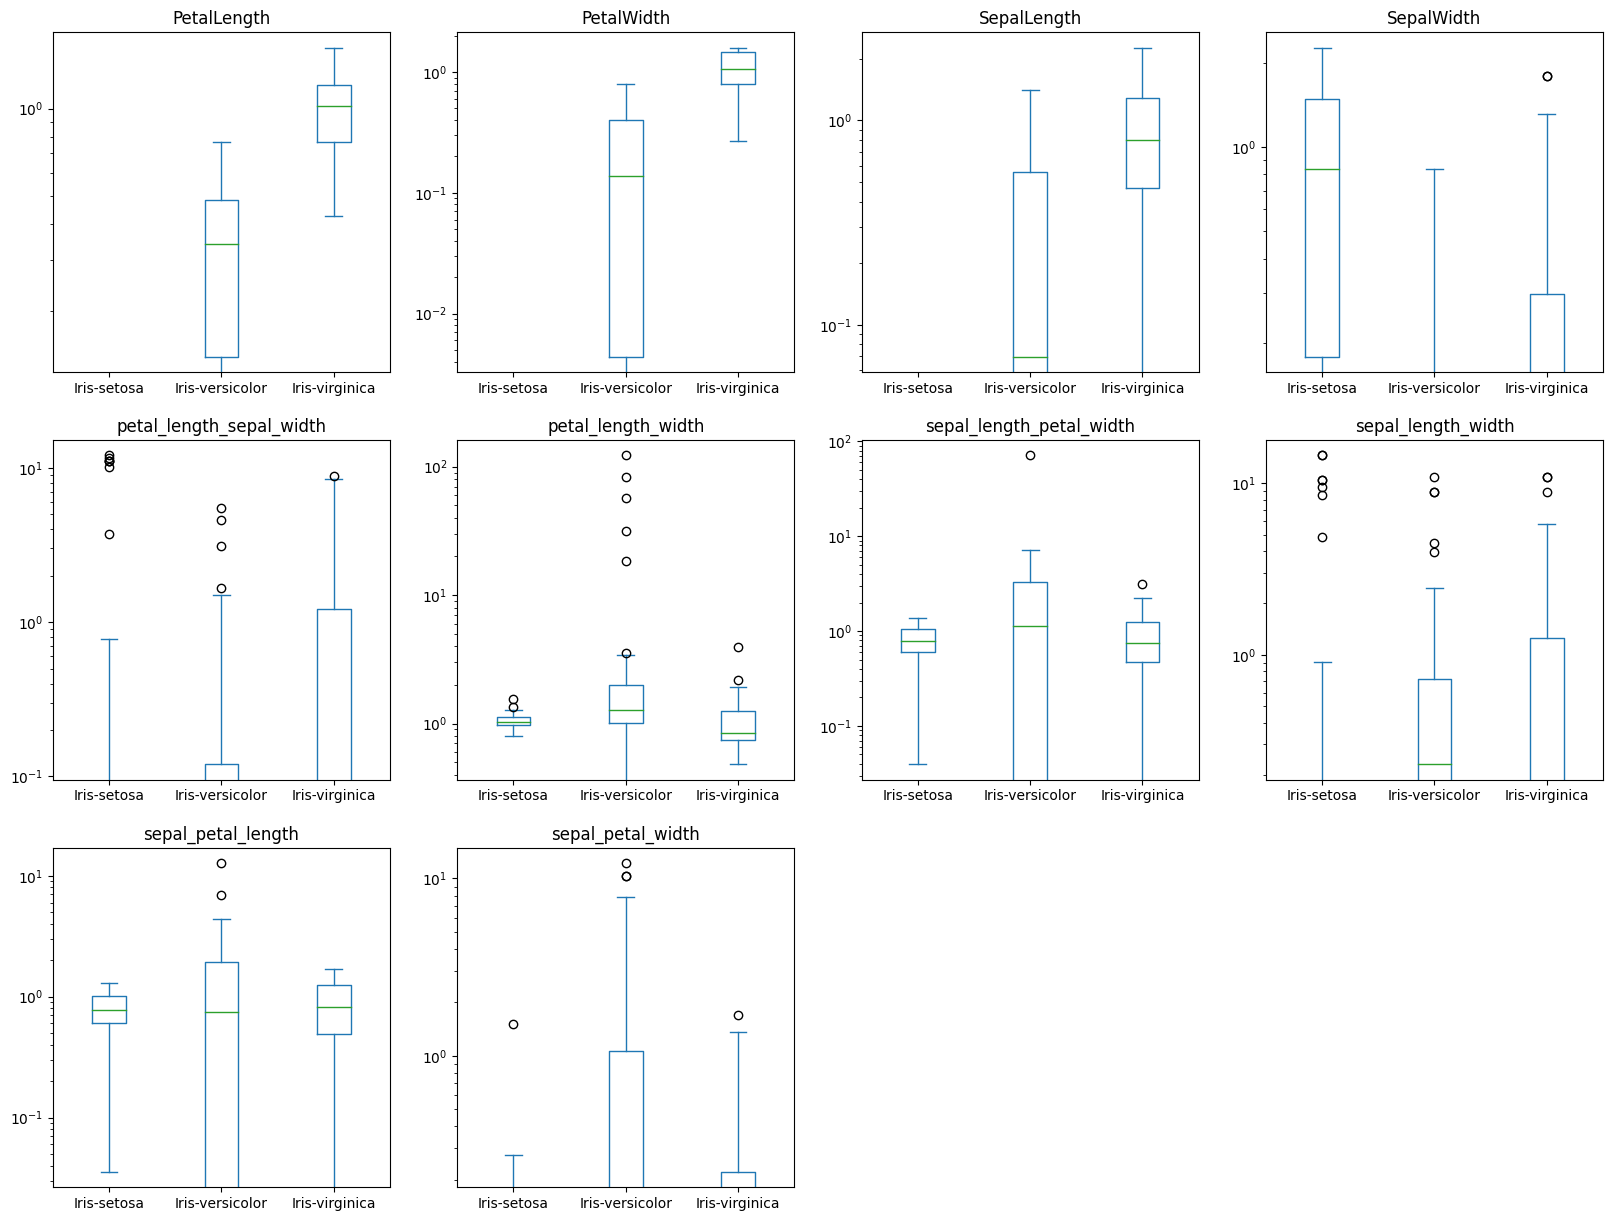

In [49]:
import numpy as np
X['sepal_length_width'] = np.divide(X['SepalLength'], X['SepalWidth'])
X['petal_length_width'] = np.divide(X['PetalLength'], X['PetalWidth'])
X['sepal_petal_length'] = np.divide(X['SepalLength'], X['PetalLength'])
X['sepal_petal_width'] = np.divide(X['SepalWidth'], X['PetalWidth'])
X['sepal_length_petal_width'] = np.divide(X['SepalLength'], X['PetalWidth'])
X['petal_length_sepal_width'] = np.divide(X['PetalLength'], X['SepalWidth'])
X.head()
X['Name'] = y
X.plot.box(by="Name", figsize=(20,15), logy=True, layout=(3,4))
X.drop(columns=['Name'], inplace=True)

No because all features are numeric.

### 2.1.4. Do you think it makes sense to derive any more features from the given ones? Why/why not?

Since we do only have 150 data entries it could help to create more features from the given ones.

## 2.2. Split up the dataset into a training and a separate held back test set in a clever way

For the x-axis all features get used, for y only the name.
We use 30% for the test size and a random value for the random_state.

In [50]:
from sklearn.model_selection import train_test_split

# splitting the dataframe into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y,
                                                 test_size=0.30,
                                                 random_state=57,
                                                 stratify=df['Name'])

### 2.2.1. Why is such a train/test split important?

Because without a train test split it isn't possible to detect if the model is overfitted or not.
Never test a model with the training data.
That's why you normally split the data into train and test data.

## 2.2.2. Which train/test split percentage do you choose and why?

Normally common split percentages are 80/20, 70/30 or 50/50.
Because we have only 150 data entries, a higher train set is necessary, that's the reason we use only one third for testing.


### 2.2.3. Think about how can you make sure to include samples from all three classes in both datasets and why this is important.

With sklearn it is possible to set a class and the library makes sure to include samples from all three classes in both datasets.
Otherwise you could group the data manually and create separate datasets.

# 2.3. Train different classification models to distinguish between the three Iris Plant Species:
– Use the following models: k Nearest Neighbour, Decision Tree, Support Vector Machine

### 2.3.1. K Nearest Neighbour
We test knn with a k range from 1 to 31 and use the k value with the best accuracy.

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'leaf_size': [15, 20]
    },
    scoring='accuracy',
    cv=3,
)

knn.fit(X_train, y_train)
print(knn.best_params_)

{'leaf_size': 15, 'n_neighbors': 5, 'weights': 'distance'}


### 2.3.2. Decision Tree

Create a decision tree and test with different criterions, splitters and max depths.
The best option is printed below.

In [52]:
from sklearn.tree import DecisionTreeClassifier

tree = GridSearchCV(
    estimator= DecisionTreeClassifier(),
    param_grid= [{
        'splitter': ['best', 'random'],
        'max_depth': [10, 100, 1000],
        'criterion': ['gini', 'entropy', 'log_loss'],
        'class_weight': ['balanced']}],
        scoring= "accuracy",
        cv= 3
    )
tree.fit(X_train, y_train)

print(tree.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}


### 2.3.3. Support Vector Machines
In the example below different kernels get used, the data classes are balanced.

In [53]:
from sklearn import svm

param_grid = {
 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'class_weight':['balanced', None]}

clf = svm.SVC(random_state=37)

svm = GridSearchCV(clf, param_grid)
svm.fit(X_train, y_train)

print(f"Best train score: {svm.best_score_} with following parameters: {svm.best_params_}")

Best train score: 0.9523809523809523 with following parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}


### 2.3.4. Neural Network

In [54]:
from sklearn.neural_network import MLPClassifier

nn = GridSearchCV(
    estimator=MLPClassifier(max_iter=10_000),
    param_grid= [{
        'hidden_layer_sizes': [3, 6, 9, 12],
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['lbfgs', 'sgd', 'adam'],
        'learning_rate': ['constant', 'adaptive']
    }]
)
nn.fit(X_train, y_train)

print(f"Best train score: {nn.best_score_} with following parameters: {nn.best_params_}")

Best train score: 0.9333333333333333 with following parameters: {'activation': 'tanh', 'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'solver': 'adam'}


## 2.4. Use different hyperparameter settings for each model and explain why and how you chose them

The models get trained with different hyperparameter combination and the best ones get used depending on the accuracy.

## 2.5. Estimate the models’ performances on the held back test set:

In [55]:
print('KNN:', knn.score(X_test, y_test))
print('Tree:', tree.score(X_test, y_test))
print('SVM:', svm.score(X_test, y_test))
print('NN:', nn.score(X_test, y_test))

KNN: 0.8444444444444444
Tree: 0.9333333333333333
SVM: 0.9333333333333333
NN: 0.8888888888888888


## 2.6. Compare the models with their hyperparameter settings with two different error/performance measures

### 2.6.1. Why did you chose the specific error/performance measures?

We choose the sklearn classification report because it is build in and easy to use.

### 2.6.2. What do they tell you?

- Precision: What percent of your predictions are correct?
- Recall: What percent of the positive cases did you catch?
- F1: What percent of positive predictions were correct
- Support: This is the number of actual occurrences of the class in the specified dataset.

The report itself contains these metrics for each class.
We can use it for testing how well our models work on the test dataset.

In [56]:
from sklearn.metrics import classification_report

print('-- KNN --')
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

-- KNN --
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.85      0.73      0.79        15
 Iris-virginica       0.72      0.87      0.79        15

       accuracy                           0.84        45
      macro avg       0.86      0.84      0.85        45
   weighted avg       0.86      0.84      0.85        45



In [57]:
print('-- Tree --')
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

-- Tree --
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.88      0.93      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



In [58]:
print('-- SVM --')
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

-- SVM --
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



In [59]:
print('-- NN -- ')
y_pred = nn.predict(X_test)
print(classification_report(y_test, y_pred))

-- NN -- 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.86      0.80      0.83        15
 Iris-virginica       0.81      0.87      0.84        15

       accuracy                           0.89        45
      macro avg       0.89      0.89      0.89        45
   weighted avg       0.89      0.89      0.89        45



### 2.6.3. Which model performs best with which hyperparameter settings and why do you think it does that way?

SVM performs the best with following parameters:

In [60]:
print('Tree:', tree.best_params_)

Tree: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}


## 2.7. Explain which model you would use in deployment and why

I would use tree because it has the best performance and works very well to separate between the classes, when you look at the classification report.
Also a decision tree model is relatively easy and performant.